# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1949

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

2

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

2

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'Lundi 18 Juillet 1949 WSSSr \nHBjUa^giLA LIBRE BELGIQUE BS^B \nID H • B B B • • • B D • =J I 11 tt l> U B H M E H • B B 9 B B B B B BIli CHRONIQUE FEMININE \nMéditation sur la beauté \n•••-\nc Tu me diras '

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"Lundi 18 Juillet 1949 WSSSr \nHBjUa^giLA LIBRE BELGIQUE BS^B \nID H • B B B • • • B D • =J I 11 tt l> U B H M E H • B B 9 B B B B B BIli CHRONIQUE FEMININE \nMéditation sur la beauté \n•••-\nc Tu me diras lequel tu préfè\xad\nres, c'est-à-dire celui que tu vou\xad\ndrais avoir devant les yeux pour le \nreste de ta vie sans en être fati\xad\nguée jamais, et nous le volerons \nensemble ! », me dit mon oncle. \nSur cette résolution pleine d'hon\xad\nnêteté, nous nous séparâmes, trou\xad\nvant que ta contemplation parfai\xad\nte d"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1949_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'LUNDI JUILLET WSSSR HBJUA GILA LIBRE BELGIQUE BILI CHRONIQUE FEMININE MÉDITATION BEAUTÉ DIRAS LEQUEL PRÉFÈ RES CELUI VOU DRAIS DEVANT YEUX RESTE VIE FATI GUÉE JAMAIS VOLERONS ENSEMBLE ONCLE RÉSOLUTION PLEINE HON NÊTETÉ SÉPARÂMES TROU VANT CONTEMPLATION PARFAI BEAUTÉ OPÈRE SILENCE VISITIONS PREMIÈRE EXPOSITION ART OUVERTE GUERRE MAÎTRES ANCIENS ANNONÇAIT AFFICHE BATTANT SYMPATHIE PAVILLON DFUNE NATION AMIE POSSÉDONS BEAU DISAIT TOUCHANT MESSAGE NISTRE ARTS PAYS SIGNE SIÈCLE MATIÈRE VOIR PEUPLES A'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('HEE', 28), ('ANS', 24), ('MENT', 21), ('SEPTEMBRE', 20), ('TOUTE', 19), ('BEAUTÉ', 18), ('COMMISSION', 18), ('BEAU', 17), ('PEU', 17), ('TROP', 17)]


### Créer, stocker et afficher le nuage de mots

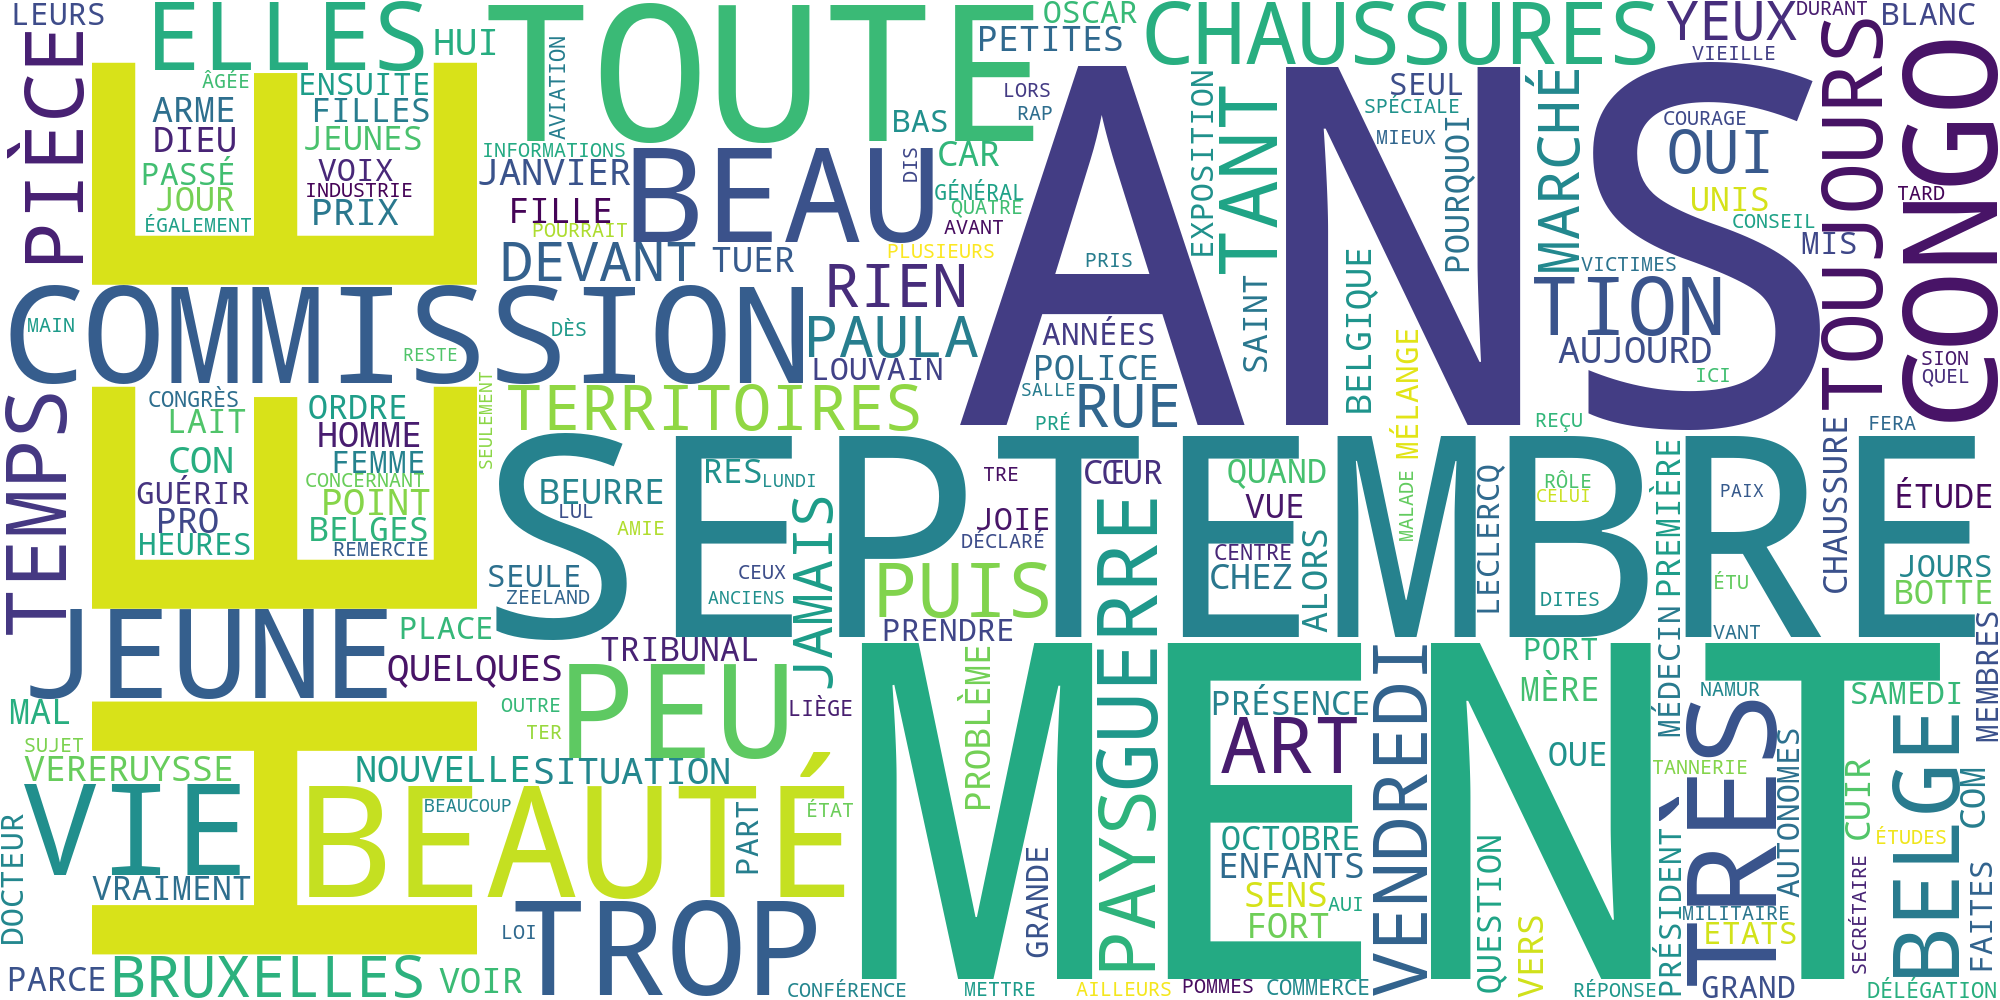

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))